<a href="https://colab.research.google.com/github/Pravesh001/Data-Science/blob/main/Black_Friday_Reg_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_black_friday.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_blak_friday_sale.csv')

In [6]:
print(df.shape)
#print(df_test.shape)

(550068, 12)


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [13]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

categorical_cols = list(df_total.columns[df_total.dtypes==object])
integer_cols = list(df_total.columns[df_total.dtypes==np.int64])
float_cols = list(df_total.columns[df_total.dtypes==np.float64])

In [14]:
cat_col = ['Product_ID', 'Gender', 'Age', 'City_Category','Stay_In_Current_City_Years']

In [15]:
for i in range(len(cat_col)):
    print('---------'+cat_col[i]+'----------')
    print(df[cat_col[i]].value_counts())

---------Product_ID----------
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00340742       1
P00143442       1
P00364342       1
P00185942       1
P00238842       1
Name: Product_ID, Length: 3631, dtype: int64
---------Gender----------
M    414259
F    135809
Name: Gender, dtype: int64
---------Age----------
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
---------City_Category----------
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
---------Stay_In_Current_City_Years----------
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


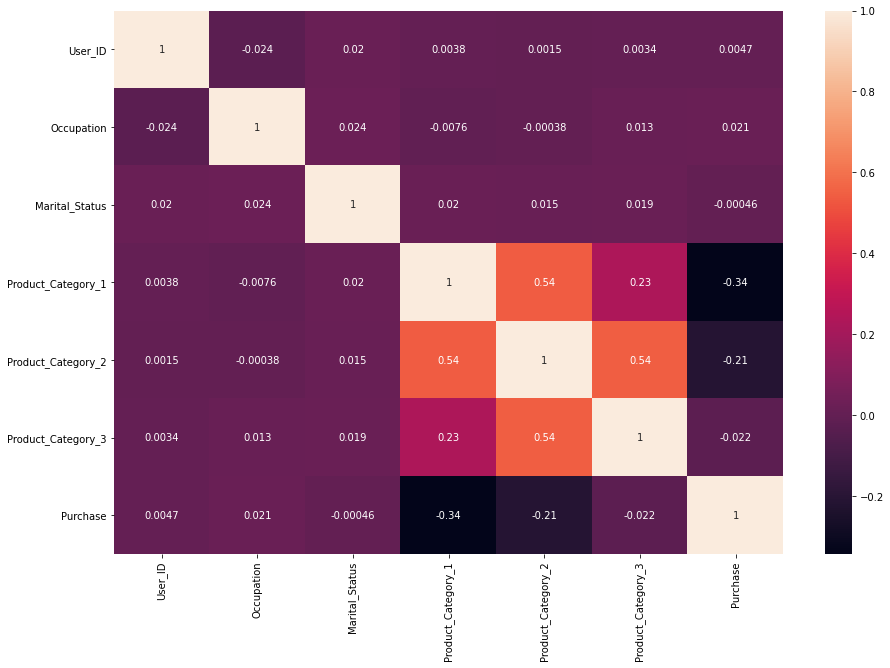

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

<Figure size 1080x720 with 0 Axes>

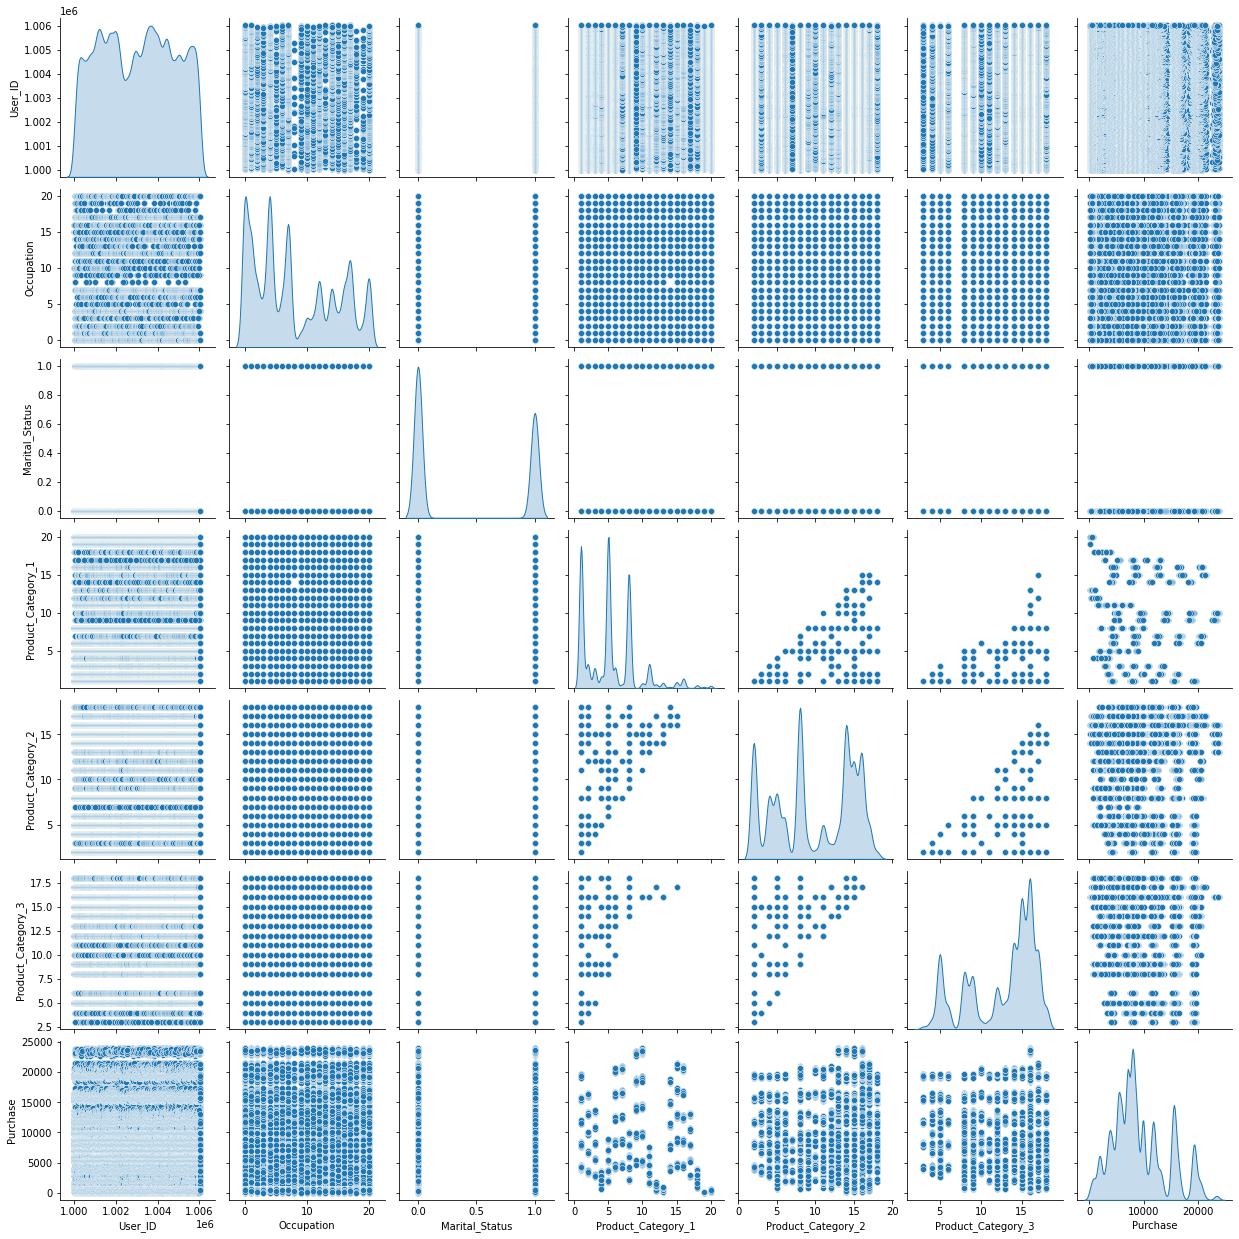

In [17]:
plt.figure(figsize=(15,10))
sns.pairplot(df,diag_kind='kde')

In [18]:
dft = df.iloc[:,1:-1]

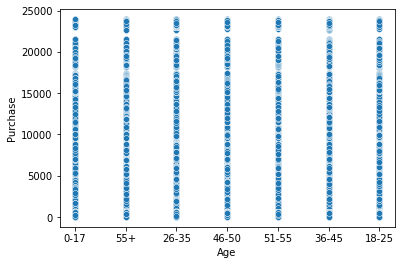

In [19]:
sns.scatterplot(x=df.Age,y=df.Purchase)

In [21]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

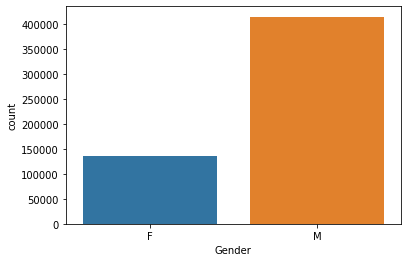

In [22]:
sns.countplot(x = 'Gender',data = df)

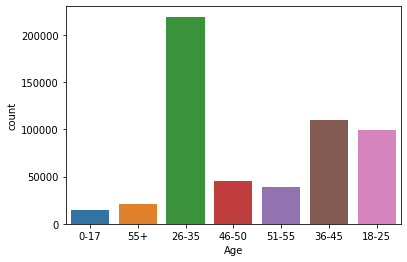

In [23]:
sns.countplot(x = 'Age',data = df)

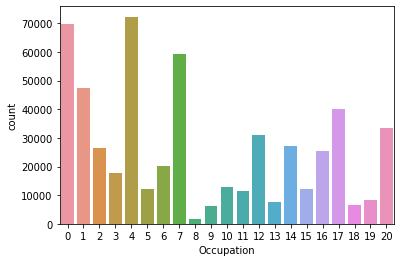

In [24]:
sns.countplot(x = 'Occupation',data = df)

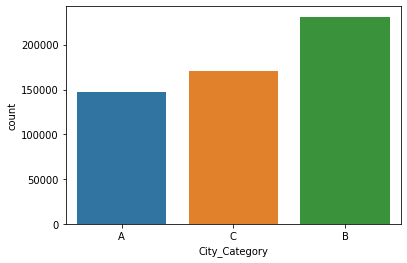

In [25]:
sns.countplot(x = 'City_Category',data = df)

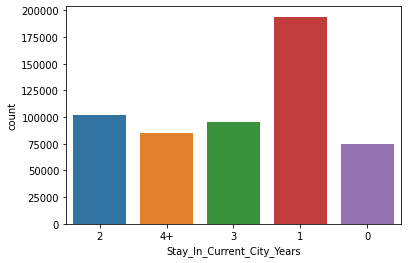

In [26]:
sns.countplot(x = 'Stay_In_Current_City_Years',data = df)

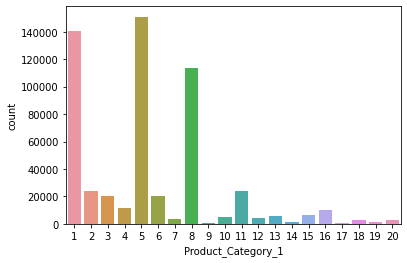

In [27]:
sns.countplot(x = 'Product_Category_1',data = df)

In [28]:
df.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

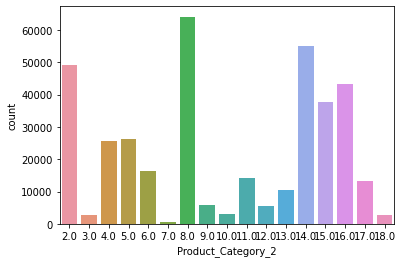

In [29]:
sns.countplot(x = 'Product_Category_2',data = df)

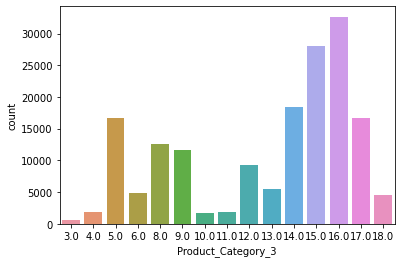

In [30]:
sns.countplot(x = 'Product_Category_3',data = df)

# Preprocessing 

In [5]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [6]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [7]:
# imputing values via constant

In [9]:
df1 = df.copy()

In [12]:
def fillna_cat(df1):
  df1['Product_Category_2'].fillna(0, inplace=True)
  df1['Product_Category_3'].fillna(0, inplace=True)
  return df1

In [13]:
fillna_cat(df1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [34]:
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

In [35]:
df.isnull().sum().sum()

0

In [36]:
df = df.astype({'Product_Category_2': 'int64'})
df = df.astype({'Product_Category_3': 'int64'})

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int64 
 10  Product_Category_3          550068 non-null  int64 
 11  Purchase                    550068 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 50.4+ MB


In [38]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,19,19,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,19,19,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,19,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,19,19,7969


In [39]:
#encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping


{'F': 0, 'M': 1}

In [41]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df.Age = le1.fit_transform(df.Age)
le_name_mapping1 = dict(zip(le1.classes_, le1.transform(le1.classes_)))
le_name_mapping1


{'0-17': 0,
 '18-25': 1,
 '26-35': 2,
 '36-45': 3,
 '46-50': 4,
 '51-55': 5,
 '55+': 6}

In [42]:
df.Age.value_counts()

2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df.Stay_In_Current_City_Years = le1.fit_transform(df.Stay_In_Current_City_Years)
le_name_mapping1 = dict(zip(le1.classes_, le1.transform(le1.classes_)))
le_name_mapping1


{'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}

In [44]:
dt = pd.get_dummies(df.City_Category)

In [45]:
df = pd.concat([df, dt], axis=1)

In [46]:
df.drop(columns=['City_Category'],axis = 1, inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int64 
 3   Age                         550068 non-null  int64 
 4   Occupation                  550068 non-null  int64 
 5   Stay_In_Current_City_Years  550068 non-null  int64 
 6   Marital_Status              550068 non-null  int64 
 7   Product_Category_1          550068 non-null  int64 
 8   Product_Category_2          550068 non-null  int64 
 9   Product_Category_3          550068 non-null  int64 
 10  Purchase                    550068 non-null  int64 
 11  A                           550068 non-null  uint8 
 12  B                           550068 non-null  uint8 
 13  C                           5

In [48]:
df.drop(columns=['User_ID', 'Product_ID'],axis = 1, inplace = True)

In [49]:
y = df.Purchase
X = df.drop(columns= ['Purchase'],axis = 1)

In [50]:
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

#spliting data set into 80 and 20 percent.

In [51]:
# modleing

In [52]:
from sklearn.linear_model import LinearRegression
model_1_LinearRegression = LinearRegression()   
model_1_LinearRegression.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# LinearRegression accuracy
model_1_LinearRegression.score(X_test, y_test)

0.14366750807673334

In [54]:
from sklearn.tree import DecisionTreeRegressor
model_2_DecisionTreeRegressor = DecisionTreeRegressor(random_state = 0)
model_2_DecisionTreeRegressor.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [55]:
# DecisionTreeRegressor accuracy
model_2_DecisionTreeRegressor.score(X_test,y_test)

0.5508204425959117

In [56]:
import xgboost as xg
model_3_XGBRegressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 25, seed = 10) 
model_3_XGBRegressor.fit(X_train,y_train)

[08:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=25,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
             silent=None, subsample=1, verbosity=1)

In [57]:
# XGBRegressor accuracy
model_3_XGBRegressor.score(X_test,y_test)

0.5372856674225129

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

Cs = [0.001, 0.01, 0.1, 1]
gammas = [0.001, 0.01, 0.1]

param_grid = dict(svr__estimator__gamma=gammas, svr__estimator__C=Cs)

svm_est = Pipeline([('svr',OneVsRestClassifier(SVR()))])

rand_grid = RandomizedSearchCV(svm_est, param_distributions=param_grid,
                               cv=5,n_iter=5,scoring='neg_mean_squared_error')
rand_grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
rand_grid.best_params_

In [ ]:
rand_grid.best_score_

In [ ]:
svm_est.fit(X_train, y_train)
y_test_pred = svm_est.predict(X_test)

In [ ]:
# Prediction on df_test file